In [1]:
import os
import pandas as pd
import pcntoolkit as ptk
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
# --构建模型的x、y
allHC = pd.read_csv('/Volumes/QCI/NormativeModel/FeatureData/StructureFeature/allstruc/combat/allHC_GrayVol_combat.csv')
anding = allHC.loc[allHC['site'] == 'anding']                                               # 获取site = "anding"
                                                                      # 加一列，标识站点 - 0
allHCP = allHC.loc[allHC['site'] != 'anding']    # 获取其他站点的数据(此时的allHC,从allHC中排除了


In [3]:
#--要训练的脑区
idps = ['17Networks_RH_VisCent_ExStr_1','17Networks_RH_VisCent_Striate_1','17Networks_RH_VisCent_ExStr_9','17Networks_RH_SalVentAttnA_ParOper_2', '17Networks_RH_SalVentAttnA_Ins_4','17Networks_RH_SalVentAttnA_ParMed_4','17Networks_LH_TempPar_3','17Networks_LH_SalVentAttnA_Ins_4','17Networks_LH_ContA_IPS_3','17Networks_LH_DefaultA_pCunPCC_7'
        ]

In [4]:
# --构建模型的x、y
pro_dir = '/Users/qingchen/Documents/code/NormativeModelMDD/Step_4th_NormativeModel/Data_struc/Result_GPR_all/'
if not os.path.isdir(pro_dir):
    os.mkdir(pro_dir)
os.chdir(pro_dir)
pro_dir = os.getcwd()
allHC_X_train = (allHC[['sex','age']]).to_numpy(dtype=float)
allHC_Y_train = allHC[idps].to_numpy(dtype=float)

# sexage = pd.DataFrame(allHC_X_train)
# sexage.to_csv('sexage.csv')
# grey = pd.DataFrame(allHC_Y_train)
# grey.to_csv('grey.csv')

with open('allHC_X_train.pkl', 'wb') as file:
    pickle.dump(pd.DataFrame(allHC_X_train), file)

with open('allHC_Y_train.pkl', 'wb') as file:
    pickle.dump(pd.DataFrame(allHC_Y_train), file)

In [5]:
# --生成对应路径，方便传入参数
allHC_covfile = os.path.join(pro_dir,'allHC_X_train.pkl')  # covariates (eg age) the training samples (columns: covariates, rows: observations or subjects)
allHC_respfile = os.path.join(pro_dir,'allHC_Y_train.pkl')  # measurements  (eg cortical thickness) of the training samples (columns: the various features/ROIs, rows: observations or subjects)
output_path = os.path.join(pro_dir, 'Models/')  # output path, where the models will be written
log_dir = os.path.join(pro_dir, 'log/')
if not os.path.isdir(output_path):
    os.mkdir(output_path)
if not os.path.isdir(log_dir):
    os.mkdir(log_dir)

outputsuffix = '_AllHC_estimate'
# --训练模型
ptk.normative.estimate(covfile=allHC_covfile,
                       respfile=allHC_respfile,
                       cvfolds=2,
                       alg='gpr',
                       log_path=log_dir,
                       output_path=output_path,
                       outputsuffix=outputsuffix,
                       savemodel=True)

Processing data in /Users/qingchen/Documents/code/NormativeModelMDD/Step_4th_NormativeModel/Data_struc/Result_GPR_all/allHC_Y_train.pkl
Estimating model  1 of 10
Optimization terminated successfully.
         Current function value: 62.800225
         Iterations: 92
         Function evaluations: 292
         Gradient evaluations: 286
Estimating model  2 of 10
Optimization terminated successfully.
         Current function value: 379.154405
         Iterations: 52
         Function evaluations: 117
         Gradient evaluations: 117
Estimating model  3 of 10
Optimization terminated successfully.
         Current function value: 287.036914
         Iterations: 27
         Function evaluations: 58
         Gradient evaluations: 58
Estimating model  4 of 10
Optimization terminated successfully.
         Current function value: 32.091790
         Iterations: 58
         Function evaluations: 177
         Gradient evaluations: 170
Estimating model  5 of 10
Optimization terminated successful

/Users/qingchen/anaconda3/lib/python3.10/site-packages/scipy/optimize/_optimize.py:1764: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_cg(f, x0, args, fprime, callback=callback, c1=c1, c2=c2,


         Current function value: -192.910745
         Iterations: 40
         Function evaluations: 163
         Gradient evaluations: 152
Estimating model  7 of 10
Optimization terminated successfully.
         Current function value: -47.356973
         Iterations: 31
         Function evaluations: 71
         Gradient evaluations: 71
Estimating model  8 of 10
Optimization terminated successfully.
         Current function value: -351.522663
         Iterations: 38
         Function evaluations: 96
         Gradient evaluations: 96
Estimating model  9 of 10
Optimization terminated successfully.
         Current function value: 126.305906
         Iterations: 93
         Function evaluations: 224
         Gradient evaluations: 224
Estimating model  10 of 10


/Users/qingchen/anaconda3/lib/python3.10/site-packages/scipy/optimize/_optimize.py:1764: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_cg(f, x0, args, fprime, callback=callback, c1=c1, c2=c2,


         Current function value: 103.802519
         Iterations: 100
         Function evaluations: 235
         Gradient evaluations: 235
Estimating model  1 of 10
Optimization terminated successfully.
         Current function value: 47.446501
         Iterations: 62
         Function evaluations: 175
         Gradient evaluations: 168
Estimating model  2 of 10


/Users/qingchen/anaconda3/lib/python3.10/site-packages/scipy/optimize/_optimize.py:1764: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_cg(f, x0, args, fprime, callback=callback, c1=c1, c2=c2,


         Current function value: 330.326375
         Iterations: 76
         Function evaluations: 218
         Gradient evaluations: 207
Estimating model  3 of 10
Optimization terminated successfully.
         Current function value: 262.895196
         Iterations: 53
         Function evaluations: 136
         Gradient evaluations: 136
Estimating model  4 of 10


/Users/qingchen/anaconda3/lib/python3.10/site-packages/scipy/optimize/_optimize.py:1764: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_cg(f, x0, args, fprime, callback=callback, c1=c1, c2=c2,


         Current function value: 28.416935
         Iterations: 100
         Function evaluations: 296
         Gradient evaluations: 289
Estimating model  5 of 10
Optimization terminated successfully.
         Current function value: -307.287705
         Iterations: 63
         Function evaluations: 198
         Gradient evaluations: 195
Estimating model  6 of 10


/Users/qingchen/anaconda3/lib/python3.10/site-packages/scipy/optimize/_optimize.py:1764: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_cg(f, x0, args, fprime, callback=callback, c1=c1, c2=c2,


         Current function value: -231.153368
         Iterations: 100
         Function evaluations: 217
         Gradient evaluations: 217
Estimating model  7 of 10
Optimization terminated successfully.
         Current function value: -55.407268
         Iterations: 60
         Function evaluations: 139
         Gradient evaluations: 139
Estimating model  8 of 10


/Users/qingchen/anaconda3/lib/python3.10/site-packages/scipy/optimize/_optimize.py:1764: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_cg(f, x0, args, fprime, callback=callback, c1=c1, c2=c2,


         Current function value: -314.464987
         Iterations: 49
         Function evaluations: 140
         Gradient evaluations: 128
Estimating model  9 of 10
Optimization terminated successfully.
         Current function value: 100.042853
         Iterations: 27
         Function evaluations: 91
         Gradient evaluations: 84
Estimating model  10 of 10
Optimization terminated successfully.
         Current function value: 66.257000
         Iterations: 45
         Function evaluations: 110
         Gradient evaluations: 110
Saving model meta-data...
Evaluating the model ...
Writing outputs ...


In [6]:
# 使用虚拟数据，构建轨迹线，首先是使用虚拟数据为测试集，得到yhat
allHCtest_covariate = {'sex': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0],
                          'age': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37]}
allHCtest_covariate = pd.DataFrame(data=allHCtest_covariate)
with open('allHCtest_covariate.pkl', 'wb') as file:
    pickle.dump(pd.DataFrame(allHCtest_covariate), file)
allHC_testcovfile = os.path.join(pro_dir, 'allHCtest_covariate.pkl')
outputsuffix = '_allHC_test'
# --训练模型
ptk.normative.estimate(covfile=allHC_covfile,
                       respfile=allHC_respfile,
                       testcov=allHC_testcovfile,
                       cvfolds=None,
                       alg='gpr',
                       log_path=log_dir,
                       output_path=output_path,
                       outputsuffix=outputsuffix,
                       savemodel=True)

Processing data in /Users/qingchen/Documents/code/NormativeModelMDD/Step_4th_NormativeModel/Data_struc/Result_GPR_all/allHC_Y_train.pkl
Estimating model  1 of 10
Optimization terminated successfully.
         Current function value: 96.966032
         Iterations: 94
         Function evaluations: 252
         Gradient evaluations: 244
Estimating model  2 of 10
Optimization terminated successfully.
         Current function value: 694.140065
         Iterations: 27
         Function evaluations: 68
         Gradient evaluations: 68
Estimating model  3 of 10
Optimization terminated successfully.
         Current function value: 540.701233
         Iterations: 45
         Function evaluations: 120
         Gradient evaluations: 120
Estimating model  4 of 10
Optimization terminated successfully.
         Current function value: 47.944994
         Iterations: 60
         Function evaluations: 188
         Gradient evaluations: 180
Estimating model  5 of 10


/Users/qingchen/anaconda3/lib/python3.10/site-packages/scipy/optimize/_optimize.py:1764: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_cg(f, x0, args, fprime, callback=callback, c1=c1, c2=c2,


         Current function value: -639.312387
         Iterations: 66
         Function evaluations: 210
         Gradient evaluations: 199
Estimating model  6 of 10
Optimization terminated successfully.
         Current function value: -435.866564
         Iterations: 91
         Function evaluations: 240
         Gradient evaluations: 240
Estimating model  7 of 10


/Users/qingchen/anaconda3/lib/python3.10/site-packages/scipy/optimize/_optimize.py:1764: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_cg(f, x0, args, fprime, callback=callback, c1=c1, c2=c2,


         Current function value: -115.378921
         Iterations: 100
         Function evaluations: 238
         Gradient evaluations: 235
Estimating model  8 of 10
         Current function value: -680.160209
         Iterations: 100
         Function evaluations: 234
         Gradient evaluations: 234
Estimating model  9 of 10
Optimization terminated successfully.
         Current function value: 215.442327
         Iterations: 79
         Function evaluations: 264
         Gradient evaluations: 256
Estimating model  10 of 10
         Current function value: 158.265965
         Iterations: 51
         Function evaluations: 229
         Gradient evaluations: 194
Saving model meta-data...
Writing outputs ...


/Users/qingchen/anaconda3/lib/python3.10/site-packages/scipy/optimize/_optimize.py:1764: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_cg(f, x0, args, fprime, callback=callback, c1=c1, c2=c2,


-- [20 21 22 23 24 25 26 27 28 29 30 31 32 34 35 36 37]
-- [20 21 22 23 24 25 26 27 28 29 30 31 32 34 35 36 37]
-- [20 21 22 23 24 25 26 27 28 29 30 31 32 34 35 36 37]
-- [20 21 22 23 24 25 26 27 28 29 30 31 32 34 35 36 37]
-- [20 21 22 23 24 25 26 27 28 29 30 31 32 34 35 36 37]
-- [20 21 22 23 24 25 26 27 28 29 30 31 32 34 35 36 37]
-- [20 21 22 23 24 25 26 27 28 29 30 31 32 34 35 36 37]
-- [20 21 22 23 24 25 26 27 28 29 30 31 32 34 35 36 37]
-- [20 21 22 23 24 25 26 27 28 29 30 31 32 34 35 36 37]
-- [20 21 22 23 24 25 26 27 28 29 30 31 32 34 35 36 37]
-- [20 21 22 23 24 25 26 27 28 29 30 31 32 34 35 36 37]
-- [20 21 22 23 24 25 26 27 28 29 30 31 32 34 35 36 37]
-- [20 21 22 23 24 25 26 27 28 29 30 31 32 34 35 36 37]
-- [20 21 22 23 24 25 26 27 28 29 30 31 32 34 35 36 37]
-- [20 21 22 23 24 25 26 27 28 29 30 31 32 34 35 36 37]
-- [20 21 22 23 24 25 26 27 28 29 30 31 32 34 35 36 37]
-- [20 21 22 23 24 25 26 27 28 29 30 31 32 34 35 36 37]
CI_95 [[0.50708439 0.81305841 0.71870747 0.48800

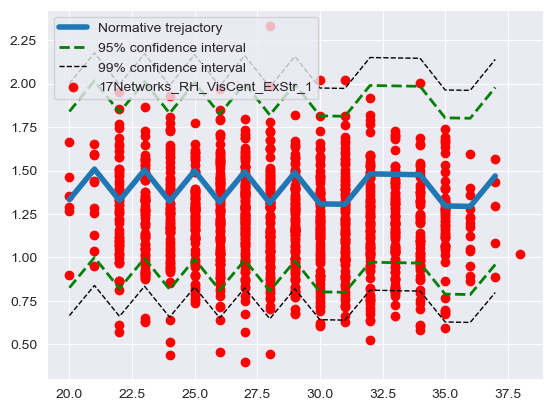

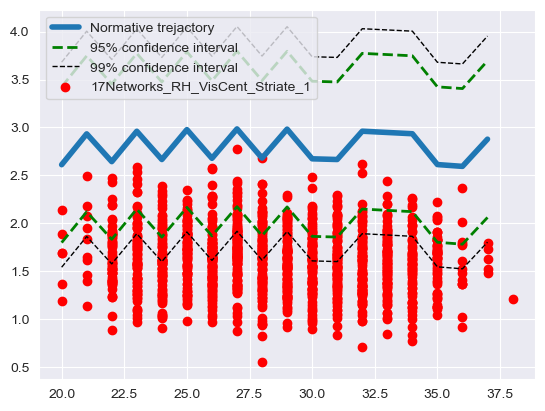

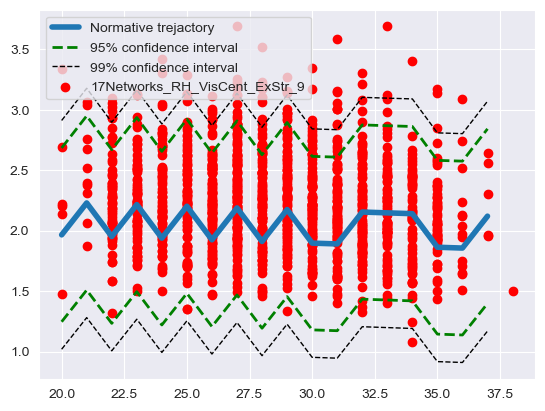

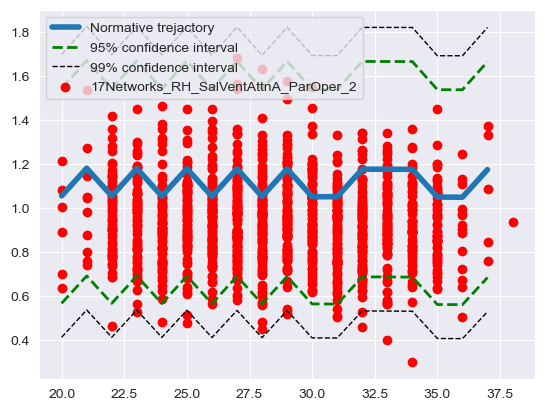

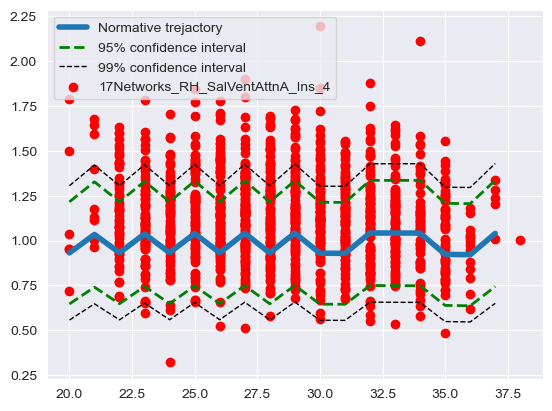

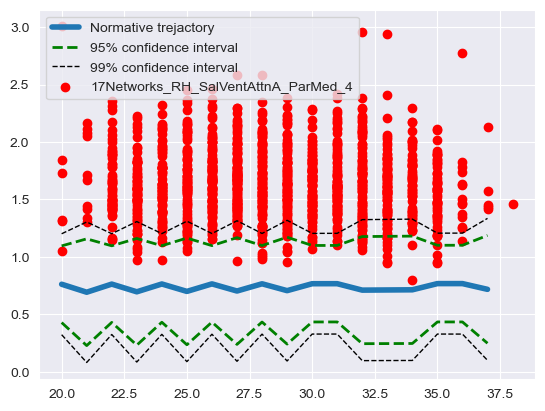

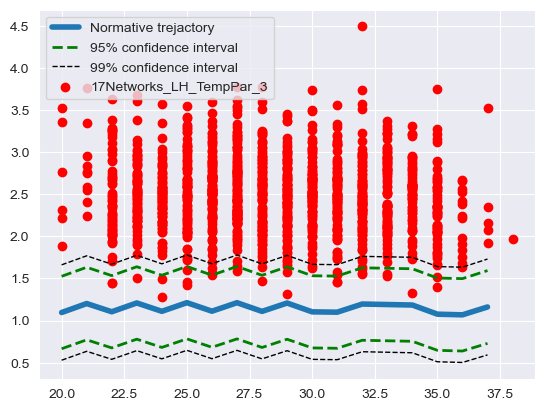

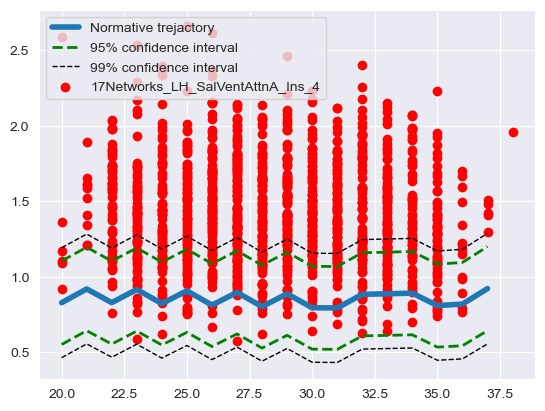

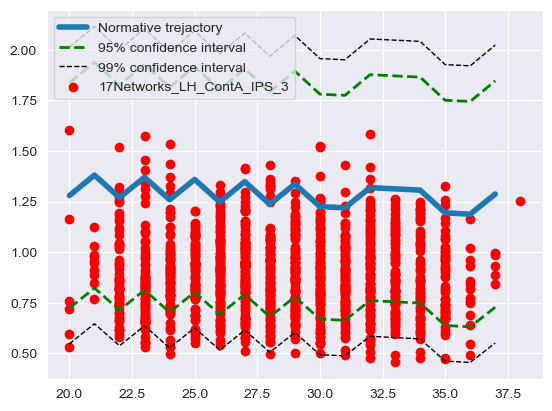

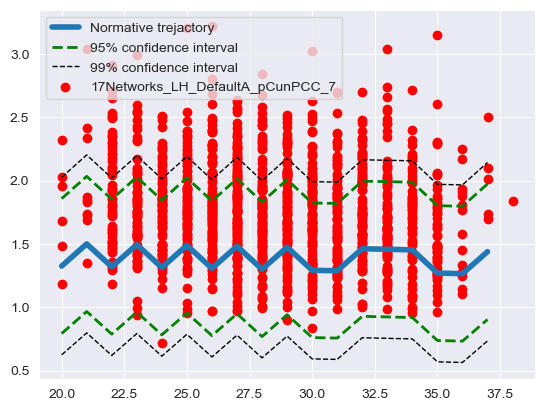

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# confidence interval calculation at x_forward
def confidence_interval(s2, x, z):
    CI = np.zeros((len(x), len(idps)))
    for i, xdot in enumerate(x):

        ci_inx = np.isin(x, xdot)
        print('--',x)

        S2 = s2[ci_inx]
        S_hat = np.mean(S2, axis=0)
        n = S2.shape[0]
        CI[i, :] = z * np.power(S_hat / n, .5)
    return CI


    # forward model data

yhat_forward = pd.read_pickle('/Users/qingchen/Documents/code/NormativeModelMDD/Step_4th_NormativeModel/Data_struc/Result_GPR_all/yhat_allHCtest.pkl')
x_forward = np.array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37])

covariate_normsample = pd.read_csv('/Volumes/QCI/NormativeModel/FeatureData/StructureFeature/allstruc/combat/allHC_GrayVol_combat.csv',index_col=0)
brainRegion = covariate_normsample.columns.tolist()
del brainRegion[0:5]

x = covariate_normsample['age'].values

# actual data
y = pd.read_csv('/Volumes/QCI/NormativeModel/FeatureData/StructureFeature/allstruc/combat/allHC_GrayVol_combat.csv')
y = y.values[:,5:]

    # confidence Interval yhat+ z *(std/n^.5)-->.95 % CI:z=1.96, 99% CI:z=2.58
s2 = pd.read_pickle('/Users/qingchen/Documents/code/NormativeModelMDD/Step_4th_NormativeModel/Data_struc/Result_GPR_all/ys2_AllHCtest.pkl')


CI_95 = np.array(confidence_interval(s2, x_forward, 1.96))
print('CI_95',CI_95)

CI_99 = np.array(confidence_interval(s2, x_forward, 2.58))
print('CI_99',CI_99[:,0])
# yhat就是预测值
# Creat a trejactroy for each point

for idp_num, idp_name in enumerate(idps):
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.plot(x_forward, np.array(yhat_forward)[:, idp_num], linewidth=4, label='Normative trejactory')

        ax.plot(x_forward, CI_95[:, idp_num] + np.array(yhat_forward)[:, idp_num], linewidth=2, linestyle='--', c='g',
                label='95% confidence interval')
        ax.plot(x_forward, -CI_95[:, idp_num] + np.array(yhat_forward)[:, idp_num], linewidth=2, linestyle='--', c='g')

        ax.plot(x_forward, CI_99[:, idp_num] + np.array(yhat_forward)[:, idp_num], linewidth=1, linestyle='--', c='k',
                label='99% confidence interval')
        ax.plot(x_forward, -CI_99[:, idp_num] + np.array(yhat_forward)[:, idp_num], linewidth=1, linestyle='--', c='k')

        ax.scatter(x, y[:, idp_num], c='r', label=idp_name)
        plt.legend(loc='upper left')
       # plt.title('Normative trejectory of' + name + ' in ' + sex + ' cohort')
        #plt.savefig('/Volumes/QCI/NormativeModel/Results/Result_GrayVol_10K_OnlyHC_kk/fqc/png/' + idp_name + '.png',dpi=300)
        plt.show()
        plt.close()



CI95
 [[0.2086827  0.35370929 0.29617076 0.20013534 0.11634094 0.13802084
  0.17661999 0.11172324 0.22943056 0.22033974]
 [0.0650836  0.10426315 0.09206159 0.06257467 0.03646066 0.04282128
  0.05502279 0.03526564 0.07138025 0.06834767]
 [0.05711717 0.09120637 0.08074061 0.05491643 0.03199333 0.03755653
  0.04825124 0.03096472 0.06263669 0.05994138]
 [0.04854101 0.07731793 0.06856066 0.04670801 0.02723327 0.03186017
  0.04102857 0.02640676 0.05319362 0.05085401]
 [0.04955534 0.07926398 0.07006807 0.04760163 0.02769883 0.03263751
  0.04184996 0.0267484  0.05439283 0.0520892 ]
 [0.05128534 0.08200378 0.07250649 0.04927227 0.02867705 0.03376641
  0.04331379 0.02770608 0.05628179 0.05389085]
 [0.05235666 0.08361818 0.07401209 0.05032741 0.02931056 0.03444016
  0.044225   0.02835368 0.05742879 0.05496672]
 [0.06450298 0.10306945 0.09120183 0.06202426 0.03614062 0.04241636
  0.05450633 0.03497638 0.07073303 0.06769992]
 [0.13563701 0.2175301  0.19162368 0.1306915  0.0763248  0.08896768
  0.11

ValueError: x and y must have same first dimension, but have shapes (10,) and (17,)

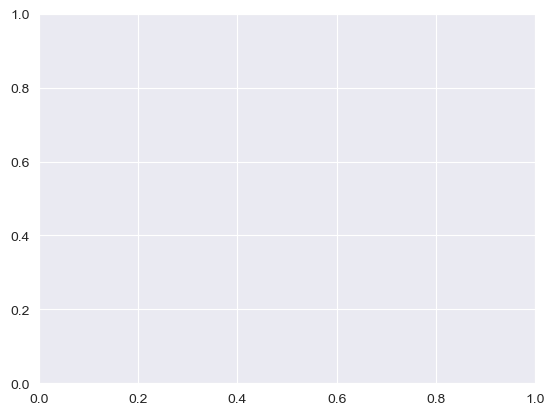

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# confidence interval calculation at x_forward
def confidence_interval(s2,x,z):
  CI = np.zeros((len(x_forward),len(idps)))
  for i,xdot in enumerate(x_forward):
    ci_inx = np.isin(x,xdot)
    S2 = s2[ci_inx]
    S_hat = np.mean(S2,axis=0)
    n = S2.shape[0]
    CI[i,:] = z*np.power(S_hat/n,.5)
  return CI
yhat_forward = pd.read_pickle('/Users/qingchen/Documents/code/NormativeModelMDD/Step_4th_NormativeModel/Data_struc/Result_GPR_all/yhat_allHCtest.pkl')   # 测试集的yhat
yhat_forward = yhat_forward.iloc[:,:].to_numpy(dtype=float)

x_forward=[20, 22, 24, 26, 28, 30, 32, 34, 36, 37]

x = allHC_X_train[:,1]    # 训练集的x 只取了年龄这一列
y = allHC_Y_train         # 训练集的y

s2 = pd.read_pickle('/Users/qingchen/Documents/code/NormativeModelMDD/Step_4th_NormativeModel/Data_struc/Result_GPR_all/ys2_AllHCestimate.pkl')   # 只有allHC训练集时，所输出的yhat
s2 = s2.iloc[:,:].to_numpy(dtype=float)

CI_95=confidence_interval(s2,x,1.96)
CI_99=confidence_interval(s2,x,2.58)
print('CI95\n',CI_95)
print('CI99\n',CI_99)
for idp_num,idp_name in enumerate(idps):
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.plot(x_forward,yhat_forward[:,idp_num], linewidth=4, label='Normative trejactory')


    ax.plot(x_forward,CI_95[:,idp_num]+yhat_forward[:,idp_num], linewidth=2,linestyle='--',c='g', label='95% confidence interval')
    ax.plot(x_forward,-CI_95[:,idp_num]+yhat_forward[:,idp_num], linewidth=2,linestyle='--',c='g')

    ax.plot(x_forward,CI_99[:,idp_num]+yhat_forward[:,idp_num], linewidth=1,linestyle='--',c='k', label='99% confidence interval')
    ax.plot(x_forward,-CI_99[:,idp_num]+yhat_forward[:,idp_num], linewidth=1,linestyle='--',c='k')

    ax.scatter(x,y[:,idp_num],c='r', label=idp_name)
    plt.legend(loc='upper right')
    plt.title('Normative trejectory')
    plt.show()
    plt.close()

In [10]:
RMSE_estimate = pd.read_pickle('/Users/qingchen/Documents/code/NormativeModelMDD/Step_4th_NormativeModel/Data_struc/Result_GPR_all/RMSE_AllHCestimate.pkl')
SMSE_estimate = pd.read_pickle('/Users/qingchen/Documents/code/NormativeModelMDD/Step_4th_NormativeModel/Data_struc/Result_GPR_all/SMSE_AllHCestimate.pkl')
Rho_estimate = pd.read_pickle('/Users/qingchen/Documents/code/NormativeModelMDD/Step_4th_NormativeModel/Data_struc/Result_GPR_all/Rho_AllHCestimate.pkl')
pRho_estimate = pd.read_pickle('/Users/qingchen/Documents/code/NormativeModelMDD/Step_4th_NormativeModel/Data_struc/Result_GPR_all/pRho_AllHCestimate.pkl')

df_RMSE = pd.concat([RMSE_estimate, SMSE_estimate, Rho_estimate,pRho_estimate], axis=1)  # 将两列拼接在一起，axis=1 表示按列拼接
df_RMSE.columns = ['RMSE_estimate', 'SMSE_estimate','Rho_estimate','pRho_estimate']
print(df_RMSE)

   RMSE_estimate  SMSE_estimate  Rho_estimate  pRho_estimate
0       0.258627       0.895530      0.323625   5.244379e-33
1       0.414440       0.885590      0.338438   3.465598e-36
2       0.365495       0.869650      0.361051   2.066029e-41
3       0.250491       0.957629      0.211818   1.752385e-14
4       0.145092       0.825661      0.417628   1.234278e-56
5       0.170076       0.959564      0.201525   3.234027e-13
6       0.218630       0.947608      0.229289   8.623714e-17
7       0.140385       0.903594      0.310821   2.090422e-30
8       0.283604       0.959708      0.201209   3.528093e-13
9       0.272460       0.906620      0.307854   8.012967e-30
